In [21]:
import numpy as np
import pandas as pd
import functions as f
import matplotlib.pyplot as plt

from matplotlib import rc
rc('text', usetex=True)

np.random.seed(2018)

## Robust Matrix Sensing (RMS)

Low-rank matrices are ubiquitous in computer vision, machine learning,
and data science applications. One fundamental computational task is to recover a Positive Semi-Definite low-rank matrix $X^* \in \mathbb{R}$ with $rank(X^*) = r \le n$ from a small number of linear measurements arbitrarily corrupted with outliers. $$y=A(X^*)+s^*$$

where $A$ is a linear measurement operator consisting of a set of sensing matrices $A_{1},...,A_{m}$ and $s^*$ is a sparse outliers vector.

Let us simulate this process accordingly to generate the RMS data that will be used to test the algorithms.

In [2]:
def generate_RMS(m, n, r, p_fail):
    """
        Auxilary function to generate the RMS data.
        Takes as input:
            m:
            n:
            r:
            p_fail:
        Gives as output:
            y:
            A:
            X:
    """
    U = np.random.normal(size=(n, r))
    X = U@U.transpose()

    y = np.zeros(m)
    A = []

    for i in range(m):
        A.append(np.random.normal(size=(n, n)))
        y[i] = f.trace(X.transpose()@A[i])

    outliers = np.zeros(m)
    indices = np.random.permutation(m)

    limit = int(np.floor(p_fail*m))
    chosen = indices[:limit]

    outliers[chosen] = 10*np.random.normal(size=(limit))
    y+=outliers
    
    return y, A, X

In [11]:
def incremental_prox_linear(mu_0, rho, U_0, n_iter, data, verbosity=0):
    """
        Implementation of the incremental prox linear algorithm
        
        
        Note: Make sure data is in the correct shape (y, A, X)
    """
    y, A, X = data 
    
    U = U_0
    U_pre = U
    
    dist = []
    for j in range(n_iter):
        # Calculate the step size
        mu = mu_0*rho**j
        
        dist.append(f.norm(U@U.transpose() - X))
        if verbosity == 1:
            print(f'Iteration: {j}, loss: {dist[j]}')
        for i in range(m):
            A_ = mu*(A[i] + A[i].transpose())@U_pre
            b = -mu*f.trace(U_pre.transpose()@A[i]@U_pre) - mu*y[i]
            
            scaler = (f.trace(A_.transpose()@U_pre) + b) / f.norm(A_)**2
            
            if scaler > 1:
                U = U_pre - A_
            if scaler < -1:
                U = U_pre + A_
            if scaler >= -1 and scaler<= 1:
                U = U_pre - scaler*A_
            U_pre = U
    return dist, U

In [12]:
def stochastic_prox_linear(mu_0, rho, U_0, n_iter, data, verbosity=0):
    """
        Implementation of the incremental prox linear algorithm
        
        
        Note: Make sure data is in the correct shape (y, A, X)
    """
    y, A, X = data 
    
    U = U_0
    U_pre = U
    
    dist = []
    for outer in range(n_iter):
        # Calculate the step size
        mu = mu_0*rho**outer
        
        dist.append(f.norm(U@U.transpose() - X))
        if verbosity == 1:
            print(f'Iteration: {outer}, loss: {dist[outer]}')
        for inner in range(m):
            i = np.random.randint(0, m)
            A_ = mu*(A[i] + A[i].transpose())@U_pre
            b = -mu*f.trace(U_pre.transpose()@A[i]@U_pre) - mu*y[i]
            
            #if j<20 and i==2:
            #    print(f'Iteration: {j}, norm: {f.norm(A_)**2}')
            scaler = (f.trace(A_.transpose()@U_pre) + b) / f.norm(A_)**2
            
            if scaler > 1:
                U = U_pre - A_
            if scaler < -1:
                U = U_pre + A_
            if scaler >= -1 and scaler<= 1:
                U = U_pre - scaler*A_
            U_pre = U
    return dist, U

In [13]:
n = 50
r = 5
m = 5*n*r
p_fail = 0.3

data = generate_RMS(m, n, r, p_fail)

In [14]:
mu_0 = 30/m
rho = 0.75
U_0 = np.random.normal(size=(n, r))
n_iter = 500

model_IPL = incremental_prox_linear(mu_0, rho, U_0, n_iter, data)

Iteration: 0, loss: 158.9892947209177
Iteration: 1, loss: 40.10969197561927
Iteration: 2, loss: 6.590834663158248
Iteration: 3, loss: 5.445690256526125
Iteration: 4, loss: 5.404695887035986
Iteration: 5, loss: 5.401019180571997
Iteration: 6, loss: 5.400899836755358
Iteration: 7, loss: 5.400923151326844
Iteration: 8, loss: 5.400928679530488
Iteration: 9, loss: 5.4009294334394475
Iteration: 10, loss: 5.400929529633916
Iteration: 11, loss: 5.372775333418105
Iteration: 12, loss: 5.30880294725516
Iteration: 13, loss: 5.077622337563425
Iteration: 14, loss: 4.651521502769742
Iteration: 15, loss: 4.108176413291384
Iteration: 16, loss: 3.467597167164221
Iteration: 17, loss: 2.900136196447874
Iteration: 18, loss: 2.4274514834409686
Iteration: 19, loss: 2.020568433045725
Iteration: 20, loss: 1.666252712153187
Iteration: 21, loss: 1.3490715715776527
Iteration: 22, loss: 1.0685999580763161
Iteration: 23, loss: 0.8340386923450068
Iteration: 24, loss: 0.6434165162452385
Iteration: 25, loss: 0.4939217

Iteration: 192, loss: 2.548285720720994e-13
Iteration: 193, loss: 2.548285720720994e-13
Iteration: 194, loss: 2.548285720720994e-13
Iteration: 195, loss: 2.548285720720994e-13
Iteration: 196, loss: 2.548285720720994e-13
Iteration: 197, loss: 2.548285720720994e-13
Iteration: 198, loss: 2.548285720720994e-13
Iteration: 199, loss: 2.548285720720994e-13
Iteration: 200, loss: 2.548285720720994e-13
Iteration: 201, loss: 2.548285720720994e-13
Iteration: 202, loss: 2.548285720720994e-13
Iteration: 203, loss: 2.548285720720994e-13
Iteration: 204, loss: 2.548285720720994e-13
Iteration: 205, loss: 2.548285720720994e-13
Iteration: 206, loss: 2.548285720720994e-13
Iteration: 207, loss: 2.548285720720994e-13
Iteration: 208, loss: 2.548285720720994e-13
Iteration: 209, loss: 2.548285720720994e-13
Iteration: 210, loss: 2.548285720720994e-13
Iteration: 211, loss: 2.548285720720994e-13
Iteration: 212, loss: 2.548285720720994e-13
Iteration: 213, loss: 2.548285720720994e-13
Iteration: 214, loss: 2.54828572

Iteration: 379, loss: 2.548285720720994e-13
Iteration: 380, loss: 2.548285720720994e-13
Iteration: 381, loss: 2.548285720720994e-13
Iteration: 382, loss: 2.548285720720994e-13
Iteration: 383, loss: 2.548285720720994e-13
Iteration: 384, loss: 2.548285720720994e-13
Iteration: 385, loss: 2.548285720720994e-13
Iteration: 386, loss: 2.548285720720994e-13
Iteration: 387, loss: 2.548285720720994e-13
Iteration: 388, loss: 2.548285720720994e-13
Iteration: 389, loss: 2.548285720720994e-13
Iteration: 390, loss: 2.548285720720994e-13
Iteration: 391, loss: 2.548285720720994e-13
Iteration: 392, loss: 2.548285720720994e-13
Iteration: 393, loss: 2.548285720720994e-13
Iteration: 394, loss: 2.548285720720994e-13
Iteration: 395, loss: 2.548285720720994e-13
Iteration: 396, loss: 2.548285720720994e-13
Iteration: 397, loss: 2.548285720720994e-13
Iteration: 398, loss: 2.548285720720994e-13
Iteration: 399, loss: 2.548285720720994e-13
Iteration: 400, loss: 2.548285720720994e-13
Iteration: 401, loss: 2.54828572

In [15]:
mu_0 = 30/m
rho = 0.9
U_0 = np.random.normal(size=(n, r))
n_iter = 500
p_fail = 0.3

model_SPL = stochastic_prox_linear(mu_0, rho, U_0, n_iter, data)

Iteration: 0, loss: 147.2247591080557
Iteration: 1, loss: 50.01077877972351
Iteration: 2, loss: 11.268426023852212
Iteration: 3, loss: 5.756367092653526
Iteration: 4, loss: 5.709538069753717
Iteration: 5, loss: 5.480902967298677
Iteration: 6, loss: 5.399501149128737
Iteration: 7, loss: 5.43064883604903
Iteration: 8, loss: 5.983378219054987
Iteration: 9, loss: 6.335878670807039
Iteration: 10, loss: 6.075742475489608
Iteration: 11, loss: 5.831837823452796
Iteration: 12, loss: 5.930642452633824
Iteration: 13, loss: 5.317978424642011
Iteration: 14, loss: 4.865470048168535
Iteration: 15, loss: 5.609362804745231
Iteration: 16, loss: 5.563071946344958
Iteration: 17, loss: 5.951001249778039
Iteration: 18, loss: 5.264901714378184
Iteration: 19, loss: 5.346179355390477
Iteration: 20, loss: 5.6085533036902495
Iteration: 21, loss: 5.340504722829099
Iteration: 22, loss: 5.6402649113895915
Iteration: 23, loss: 5.363974832096719
Iteration: 24, loss: 5.6831876684809455
Iteration: 25, loss: 5.415115642

Iteration: 197, loss: 8.537795658952428e-07
Iteration: 198, loss: 7.671551678974407e-07
Iteration: 199, loss: 7.103789727353043e-07
Iteration: 200, loss: 5.80037710905768e-07
Iteration: 201, loss: 5.718559920635635e-07
Iteration: 202, loss: 5.161035407117469e-07
Iteration: 203, loss: 4.7435373844644805e-07
Iteration: 204, loss: 4.810532790565163e-07
Iteration: 205, loss: 4.311521075590393e-07
Iteration: 206, loss: 3.835142147523274e-07
Iteration: 207, loss: 3.101632904880619e-07
Iteration: 208, loss: 3.1476306007587115e-07
Iteration: 209, loss: 2.9772158263181534e-07
Iteration: 210, loss: 2.7460771005082685e-07
Iteration: 211, loss: 2.5692782323805284e-07
Iteration: 212, loss: 2.117296098870071e-07
Iteration: 213, loss: 1.7037255718713893e-07
Iteration: 214, loss: 1.584340245651172e-07
Iteration: 215, loss: 1.4522436276446952e-07
Iteration: 216, loss: 1.3308233855937215e-07
Iteration: 217, loss: 1.3376239842519994e-07
Iteration: 218, loss: 1.1270168572845173e-07
Iteration: 219, loss: 1

Iteration: 384, loss: 4.966989735751541e-13
Iteration: 385, loss: 4.96598144558232e-13
Iteration: 386, loss: 4.964160463144006e-13
Iteration: 387, loss: 4.963619018048236e-13
Iteration: 388, loss: 4.963634041742504e-13
Iteration: 389, loss: 4.963646628707549e-13
Iteration: 390, loss: 4.963176753196093e-13
Iteration: 391, loss: 4.962915297921923e-13
Iteration: 392, loss: 4.962915297921923e-13
Iteration: 393, loss: 4.962935166771147e-13
Iteration: 394, loss: 4.96226715727644e-13
Iteration: 395, loss: 4.96226715727644e-13
Iteration: 396, loss: 4.96226715727644e-13
Iteration: 397, loss: 4.962935166771147e-13
Iteration: 398, loss: 4.962935166771147e-13
Iteration: 399, loss: 4.962935166771147e-13
Iteration: 400, loss: 4.962935166771147e-13
Iteration: 401, loss: 4.962935166771147e-13
Iteration: 402, loss: 4.962935166771147e-13
Iteration: 403, loss: 4.962935166771147e-13
Iteration: 404, loss: 4.962935166771147e-13
Iteration: 405, loss: 4.962935166771147e-13
Iteration: 406, loss: 4.962935166771

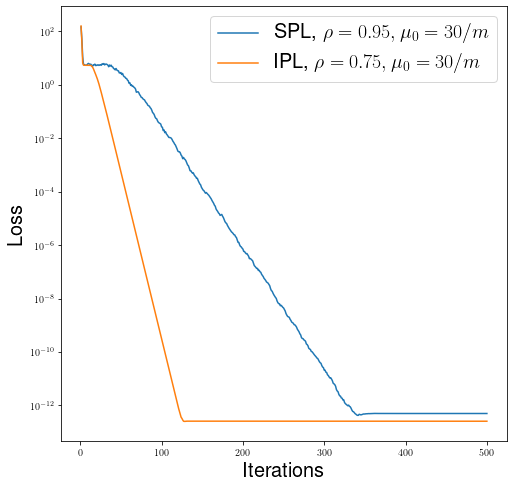

In [35]:
plt.figure(1, figsize = (8, 8))
#plt.ylim((1e-10, 0.0002))
plt.semilogy(list(range(1, 501)), model_SPL[0], label="SPL, $\\rho = 0.95, \\mu_{0} = 30/m$")
plt.semilogy(list(range(1, 501)), model_IPL[0], label="IPL, $\\rho = 0.75, \\mu_{0} = 30/m$")
plt.ylabel("Loss", fontsize=20)
plt.xlabel("Iterations", fontsize=20)
plt.legend(fontsize=20)